In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [ ]:
df_need = pd.read_csv('need.csv')

In [ ]:
# 비율 feature 생성
grouped = df_need.groupby(['행정동_코드', '행정동_코드_명']).sum(numeric_only=True).reset_index()

grouped['weekday_ratio'] = grouped['주중_매출_금액'] / grouped['당월_매출_금액']
grouped['weekend_ratio'] = grouped['주말_매출_금액'] / grouped['당월_매출_금액']
grouped['male_ratio'] = grouped['남성_매출_금액'] / grouped['당월_매출_금액']
grouped['female_ratio'] = grouped['여성_매출_금액'] / grouped['당월_매출_금액']
grouped['unknown_ratio'] = grouped['법인카드_외국인_신원미상_금액'] / grouped['당월_매출_금액']

for age in ['10', '20', '30', '40', '50', '60_이상']:
    grouped[f'{age}s_ratio'] = grouped[f'연령대_{age}_매출_금액'] / grouped['당월_매출_금액']

In [ ]:
# 클러스터링에 사용할 feature 선택
features = grouped[
    ['weekday_ratio', 'weekend_ratio', 'male_ratio', 'female_ratio', 'unknown_ratio',
     '10s_ratio', '20s_ratio', '30s_ratio', '40s_ratio', '50s_ratio', '60_이상s_ratio']
]

In [ ]:
# 표준화 (StandardScaler)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# linkage 행렬 생성 (ward 방식)
Z = linkage(scaled_features, method='ward')

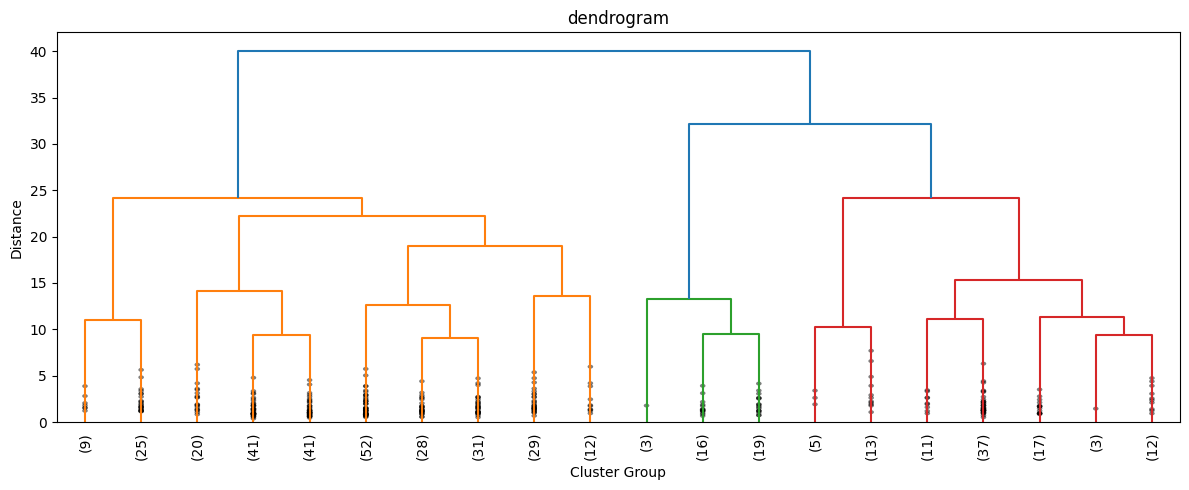

In [ ]:
# 덴드로그램 시각화
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('dendrogram')
plt.xlabel('Cluster Group')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
cluster_range = range(2, 11)
silhouette_scores = []
Inertia = []

for k in cluster_range:
    labels = fcluster(Z, t=k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(scaled_features, labels))

    centroids = np.array([scaled_features[labels == i].mean(axis=0) for i in np.unique(labels)])
    wss = sum(((scaled_features[labels == i] - centroid) ** 2).sum() for i, centroid in enumerate(centroids, start=1))
    Inertia.append(wss)

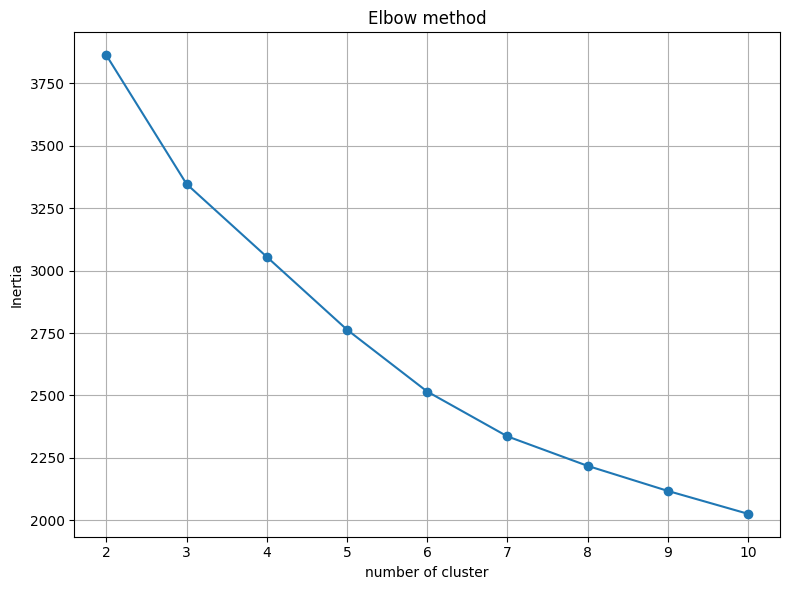

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, Inertia, marker='o')
plt.title("Elbow method")
plt.xlabel("number of cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


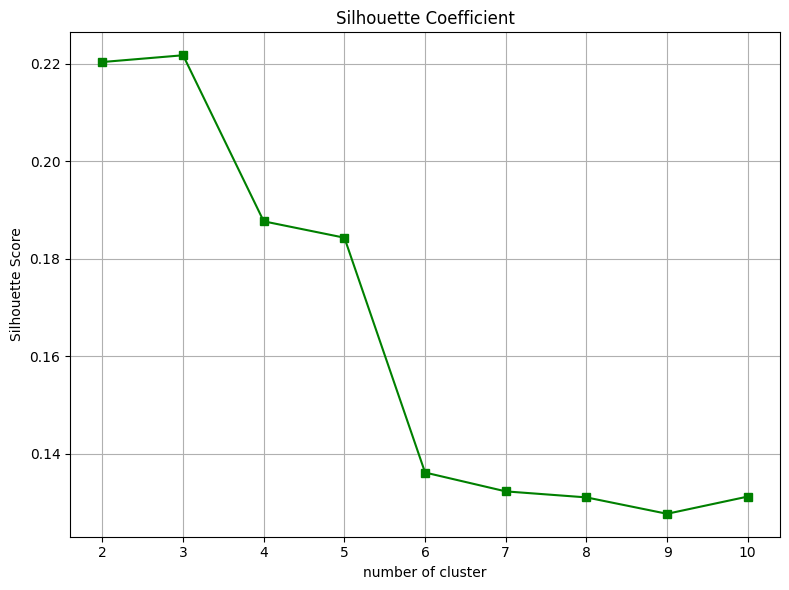

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Coefficient")
plt.xlabel("number of cluster")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped['계층_클러스터'] = fcluster(Z, t=3, criterion='maxclust')

In [ ]:
grouped.head()

,행정동_코드,행정동_코드_명,기준_년분기_코드,당월_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,...,male_ratio,female_ratio,unknown_ratio,10s_ratio,20s_ratio,30s_ratio,40s_ratio,50s_ratio,60_이상s_ratio,계층_클러스터
0,11110515,청운효자동,14074861,477973070971,359460313533,118512757438,155792600492,281149753229,1990841737,96341390537,...,0.325944,0.588213,0.085843,0.004165,0.201562,0.172685,0.167217,0.226885,0.141644,3
1,11110530,사직동,17229689,1774307936576,1431804428391,342503508185,705542177016,675170449812,5931986405,238235715313,...,0.397644,0.380526,0.221830,0.003343,0.134270,0.203413,0.170938,0.151353,0.114848,2
2,11110540,삼청동,8149981,701878586926,421668353780,280210233146,284494173178,357646413827,3788646849,156392275037,...,0.405332,0.509556,0.085112,0.005398,0.222820,0.254533,0.181361,0.153067,0.097711,3
3,11110550,부암동,8837260,131109466959,95106971420,36002495539,59265235845,57461045893,1211679851,14725374139,...,0.452029,0.438268,0.109704,0.009242,0.112314,0.148520,0.233205,0.217929,0.169088,1
4,11110560,평창동,11769543,188484783094,130630229495,57854553599,87965802106,73839092040,1931694034,9152884879,...,0.466700,0.391751,0.141549,0.010249,0.048560,0.114040,0.206386,0.231044,0.248173,1


In [ ]:
cluster_profile = grouped.groupby('계층_클러스터')[
    ['weekday_ratio', 'weekend_ratio', 'male_ratio', 'female_ratio', 'unknown_ratio',
     '10s_ratio', '20s_ratio', '30s_ratio', '40s_ratio', '50s_ratio', '60_이상s_ratio']
].mean().round(3)


print(cluster_profile)

         weekday_ratio  weekend_ratio  male_ratio  female_ratio  \
계층_클러스터                                                           
1                0.767          0.233       0.491         0.451   
2                0.841          0.159       0.448         0.362   
3                0.732          0.268       0.460         0.470   

         unknown_ratio  10s_ratio  20s_ratio  30s_ratio  40s_ratio  50s_ratio  \
계층_클러스터                                                                         
1                0.058      0.005      0.077      0.144      0.242      0.241   
2                0.190      0.004      0.111      0.193      0.202      0.172   
3                0.070      0.008      0.172      0.207      0.198      0.187   

         60_이상s_ratio  
계층_클러스터                
1               0.233  
2               0.129  
3               0.159  


In [ ]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


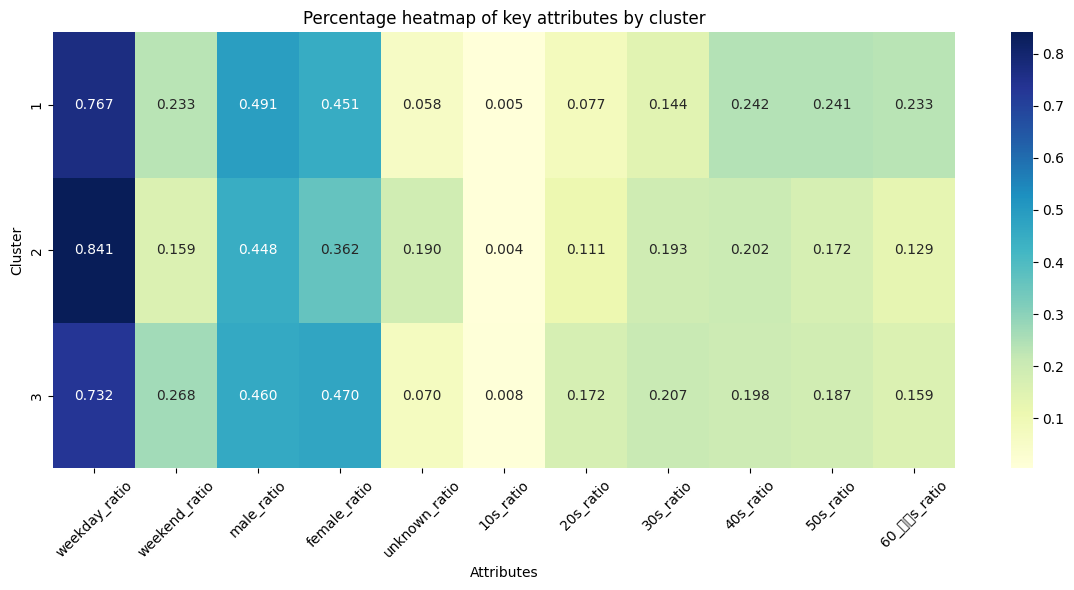

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_profile,       # 클러스터별 평균 데이터프레임
    annot=True,            # 숫자 표시
    fmt=".3f",             # 소수점 둘째 자리까지
    cmap="YlGnBu",         # 색상 테마 (연두~파랑 계열)
    cbar=True              # 오른쪽 색상바 표시
)
plt.title("Percentage heatmap of key attributes by cluster")
plt.ylabel("Cluster")
plt.xlabel("Attributes")
plt.xticks(rotation=45)    # x축 라벨 기울이기
plt.tight_layout()         # 자동 여백 조정
plt.show()


## 클러스터 1: 중장년층 기반의 안정형 지역 상권

###소비 패턴
- 주중 매출 비중이 76.7%로 높고, 주말도 23.3% 수준으로 일정 수요가 존재
- 법인·외국인 소비 비율(5.8%)이 낮아, 주로 개인 소비 중심의 지역 상권

###성별 및 연령층
- 남성 비중이 49.1%로 3개의 클러스터에서 가장 높음
- 40대(24.2%), 50대(24.1%), 60대 이상(23.3%)의 비중이 매우 높음 -> 중장년층이 소비의 중심

###종합 해석
- 전통시장, 주택가 근처의 거주민 중심 상권일 가능성
- 오피스 상권보다는 생활 밀착형 업종(예: 약국, 병원, 한식당, 식자재 마트 등)이 적합

***
## 클러스터 2: 업무지구 및 법인 중심의 평일 상권

###소비 패턴
- 주중 매출 비율이 84.1%로 가장 높음, 주말은 15.9%로 매우 낮음
- 법인·외국인/신원미상 매출 비율이 19.0%로 가장 높음

###성별 및 연령층
- 남성 비중(44.8%)이 여성(36.2%)보다 높음
- 주요 연령층은 30대(19.3%), 40대(20.2%), 50대(17.2%) -> 전형적인 직장인 소비층

###종합 해석
- 대기업 사옥, 금융기관 등이 밀집된 오피스 상권 또는 업무 밀집 지역
- 점심·저녁 회식 수요, 법인카드 사용이 활발한 곳
- 고급 음식점, 커피 전문점, 프리미엄 편의시설 등이 유리
***
## 클러스터 3: 젊은층 중심의 트렌디한 주말 상권

###소비 패턴
- 주말 매출 비중이 26.8%로 3개의 클러스터에서 가장 높음
- 법인/외국인 매출은 7.0% 수준으로 낮음 -> 개인 소비 중심


###성별 및 연령층
- 여성 비중이 47.0%로 3개의 클러스터에서 가장 높음
- 10대(0.8%), 20대(17.2%), 30대(20.7%)의 비중이 3개의 클러스터에서 가장 높음

###종합 해석
- 쇼핑, 외식, 문화 활동 중심의 소비가 활발한 지역
- 대학가, 관광지, 핫플레이스에 가까운 소비 특성을 보임
- 카페, 패션 매장, 뷰티, 젊은층 타깃 브랜드에 유리